<font style="font-size:28px;" align="left"><b> Quantum walk </b></font>
<br>

In [1]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
import matplotlib.pyplot as plt
import numpy as np

# Define the number of position qubits (3 qubits for 8 nodes)
n_position_qubits = 3

N = 2**n_position_qubits

matrix_R = np.zeros(N**2).reshape(N, N)

matrix_R[np.eye(len(matrix_R), k=-1, dtype='bool')] = 1
matrix_R[0, N-1] = 1
# print(matrix_R)

gate_R = UnitaryGate(matrix_R)

# Define a single step of the quantum walk
def quantum_walk_step(qc, n_position_qubits):    
    # Hadamard gate on the walker qubit
    qc.h(n_position_qubits)
    
    qc.append(gate_R.control(1), list(np.append([n_position_qubits], range(0, n_position_qubits))))

In [10]:
# Create the quantum circuit
qc = QuantumCircuit(n_position_qubits + 1, n_position_qubits)

display(qc.draw(reverse_bits=True))

q_3: 
     
q_2: 
     
q_1: 
     
q_0: 
     
c: 3/

In [11]:
# Initial state: set the position qubits to 0 and the walker qubit to 0
# Apply an X gate to the walker qubit to start in state |1> (representing moving right)
qc.x(n_position_qubits)

display(qc.draw(reverse_bits=True))

┌───┐
q_3: ┤ X ├
     └───┘
q_2: ─────
          
q_1: ─────
          
q_0: ─────
          
c: 3/═════

In [12]:
# Apply multiple steps of the quantum walk
num_steps = 7
for _ in range(num_steps):
    quantum_walk_step(qc, n_position_qubits)

display(qc.draw(reverse_bits=True))

┌───┐┌───┐            ┌───┐            ┌───┐            ┌───┐            »
q_3: ┤ X ├┤ H ├─────■──────┤ H ├─────■──────┤ H ├─────■──────┤ H ├─────■──────»
     └───┘└───┘┌────┴─────┐└───┘┌────┴─────┐└───┘┌────┴─────┐└───┘┌────┴─────┐»
q_2: ──────────┤2         ├─────┤2         ├─────┤2         ├─────┤2         ├»
               │          │     │          │     │          │     │          │»
q_1: ──────────┤1 Unitary ├─────┤1 Unitary ├─────┤1 Unitary ├─────┤1 Unitary ├»
               │          │     │          │     │          │     │          │»
q_0: ──────────┤0         ├─────┤0         ├─────┤0         ├─────┤0         ├»
               └──────────┘     └──────────┘     └──────────┘     └──────────┘»
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌───┐            ┌───┐            ┌───┐            
«q_3: ┤ H ├─────■──────┤ H ├─────■──────┤ H ├─────■──────
«     └───┘┌────┴─────┐└───┘┌────┴─────┐└───┘┌────┴─────┐
«q_2: ─────┤2         ├─────┤2         ├─────┤2         ├
«          │          │     │          │     │          │
«q_1: ─────┤1 Unitary ├─────┤1 Unitary ├─────┤1 Unitary ├
«          │          │     │          │     │          │
«q_0: ─────┤0         ├─────┤0         ├─────┤0         ├
«          └──────────┘     └──────────┘     └──────────┘
«c: 3/═══════════════════════════════════════════════════
«

{'000': 757, '010': 3973, '100': 13161, '110': 29010, '001': 13333, '111': 795, '011': 7086, '101': 31885}


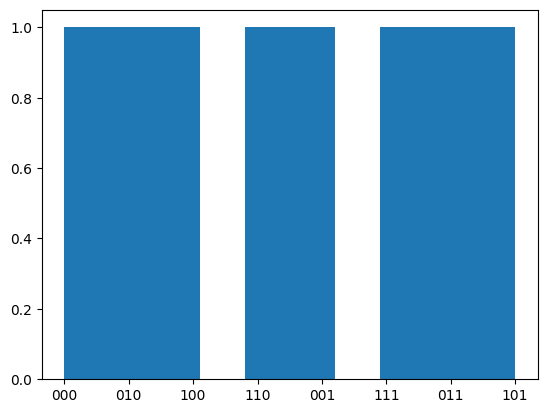

qiskit.result.counts.Counts

In [13]:
# Measure the position qubits
qc.measure(range(n_position_qubits), range(n_position_qubits))

num_shots = 100000
backend = AerSimulator()
comp = transpile(qc, backend) # transpile means transform a quantum circuit into a form that is optimized for execution on a specific quantum backend
job_sim = backend.run(comp, shots=num_shots) # run the circuit
counts = job_sim.result().get_counts(comp) # extract the results of the code execution (how namy counts of which measurement I got)
print(counts)

# Get the counts and plot the histogram

plt.hist(counts)
plt.show()
type(counts)